In [1]:
from os.path import join

import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from data_processing import full_dataset_pipeline, convert_filepaths_to_df

In [2]:
files = [
    [join("data", "sub_dataset_energy07-57-54_nico.csv"), join("data","Model_features08-12-18_nico.csv")],
    [join("data", "sub_dataset_energy07-40-32_guillaume.csv"), join("data", "Model_features08-15-31_guillaume.csv")],
    [join("data", "sub_dataset_energy07-26-12_emma.csv"), join("data", "Model_features08-15-31_guillaume.csv")],
    [join("data", "sub_dataset_energy08-43-15_nico2.csv"), join("data", "Model_features09-17-12_nico2.csv")]
]

In [3]:
files = convert_filepaths_to_df(files)

In [4]:
full_data = full_dataset_pipeline(files)

In [5]:
full_data

,Unnamed: 0,CPU_count,name_CPU_vendor_id,CPU_GHz,name_core_architecture,name_os,name_model,nb_samples,nb_preds,energy_consumed
0,0,12,GenuineIntel,2.6,AMD64,Windows,ARDRegression,20,20,8.515489e-07
1,1,12,GenuineIntel,2.6,AMD64,Windows,ARDRegression,500,20,3.209248e-07
2,2,12,GenuineIntel,2.6,AMD64,Windows,ARDRegression,500,500,1.650893e-05
3,3,12,GenuineIntel,2.6,AMD64,Windows,ARDRegression,2000,20,3.669459e-07
4,4,12,GenuineIntel,2.6,AMD64,Windows,ARDRegression,2000,500,3.534756e-06
...,...,...,...,...,...,...,...,...,...,...
705,173,12,GenuineIntel,2.6,AMD64,Windows,TweedieRegressor,500,20,6.640952e-07
706,174,12,GenuineIntel,2.6,AMD64,Windows,TweedieRegressor,500,500,6.692532e-07
707,175,12,GenuineIntel,2.6,AMD64,Windows,TweedieRegressor,2000,20,6.369508e-07
708,176,12,GenuineIntel,2.6,AMD64,Windows,TweedieRegressor,2000,500,6.886727e-07


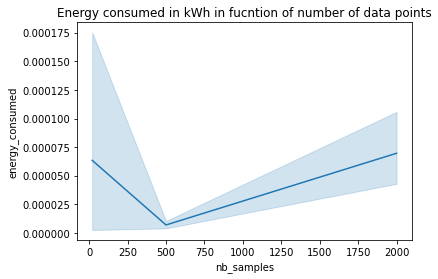

In [19]:
# Sizes versus energy, hue =name_model
sns.lineplot(data=full_data, x="nb_samples", y="energy_consumed") # kW
plt.title("Energy consumed in kWh in fucntion of number of data points")
plt.savefig(join("data", "img", "1.png"), dpi=200)

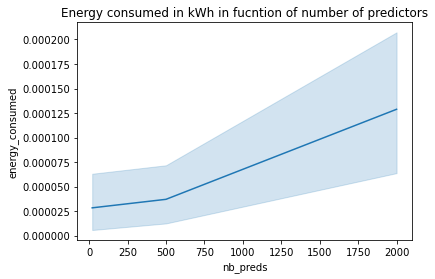

In [20]:
sns.lineplot(data=full_data, x="nb_preds", y="energy_consumed")
plt.title("Energy consumed in kWh in fucntion of number of predictors")
plt.savefig(join("data", "img", "2.png"), dpi=200)

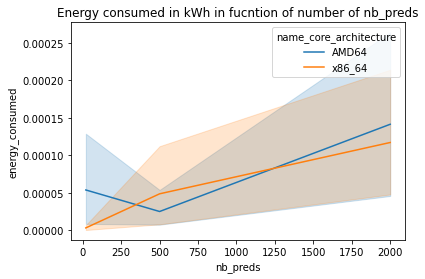

In [21]:
sns.lineplot(data=full_data, x="nb_preds", y="energy_consumed", hue="name_core_architecture")
plt.title("Energy consumed in kWh in fucntion of number of nb_preds")
plt.savefig(join("data", "img", "3.png"), dpi=200)

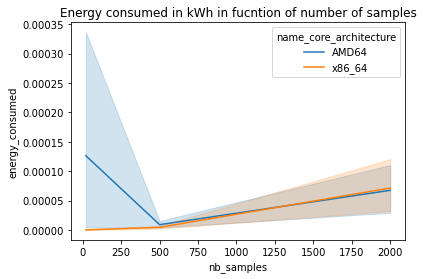

In [22]:
sns.lineplot(data=full_data, x="nb_samples", y="energy_consumed", hue="name_core_architecture")
plt.title("Energy consumed in kWh in fucntion of number of samples")
plt.savefig(join("data", "img", "4.png"), dpi=200)

In [14]:
fig = px.scatter_3d(full_data, x='nb_samples', y='nb_preds', z='energy_consumed',
              color='name_model')
fig.show()

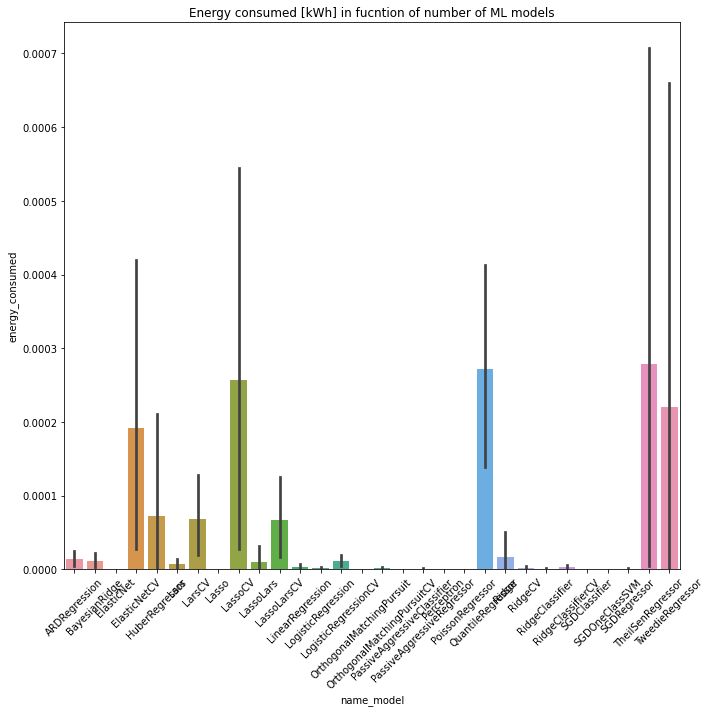

In [23]:
plt.figure(figsize=(10,10))
sns.barplot(data=full_data, x = "name_model", y="energy_consumed")
plt.xticks(rotation = 45)
plt.title("Energy consumed [kWh] in fucntion of number of ML models")
plt.tight_layout()
plt.savefig(join("data", "img", "5.png"), dpi=200)